In [1049]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xg
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

from sklearn.preprocessing import normalize, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA

In [1032]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.metrics import accuracy_score 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)
import seaborn as sns

from sklearn.metrics import mean_squared_error as rmse_error

# Function to calculate features for new games

- Imports the data
- Groupby Team with rolling averages
- re-sorts dataframe based on old index


# Reading in DF and reversing to run ML models

In [1008]:
#reading in pandas df
ml_df = pd.read_csv('data/ready_for_ml_7.csv')

#dropping 'Unnamed: 0' that should not be there
ml_df.drop('Unnamed: 0', inplace = True, axis = 1)


In [1009]:
#reversing the dataframe
ml_df = ml_df.iloc[::-1]

In [1010]:
#reseting the index and dropping the old index
ml_df.reset_index(inplace= True)
ml_df.drop('index', inplace = True, axis = 1)

In [1011]:
ml_df.dropna(inplace = True)

In [1139]:
print(np.std(ml_df['Total_pts']))

20.62079373012203


In [1157]:
#creating a new kappa 4
ml_df['k_under'] =   round(ml_df['totals'] -   round(np.std(ml_df['Total_pts'] *1.5),2))
ml_df['k_over']  =   round(ml_df['totals'] +   round(np.std(ml_df['Total_pts']*1.5),2))

In [1158]:
ml_df

,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,Team,MIN_2,PTS_2,FGM_2,FGA_2,FG%_2,3PM_2,3PA_2,3P%_2,FTM_2,FTA_2,FT%_2,OREB_2,DREB_2,REB_2,AST_2,STL_2,BLK_2,TOV_2,PF_2,+/-_2,Team_2,Total_pts,home,visitor,Open,Close,Open_2,Close_2,over_under,totals,kappa_1,kappa_2,kappa_3,k_1_under,k_1_over,k_2_under,k_2_over,k_3_under,k_3_over,k_4_under,k_4_over,k_7_under,k_7_over,k_under,k_over
113,240.0,94.0,35.0,83.0,42.0,7.0,21.0,33.0,17.0,23.0,74.0,11.0,31.0,42.0,20.0,9.0,4.0,15.0,21.0,-3.0,IND,251.0,103.0,40.0,91.0,44.0,8.0,23.0,35.0,16.0,21.0,78.0,11.0,35.0,46.0,23.0,8.0,7.0,16.0,23.0,1.0,ORL,181,IND,ORL,194.5,195,4,4,194.5,194.5,4.13165,6.197475,8.263299,190.0,199.0,188.0,201.0,186.0,203.0,184.19,204.81,180.07,208.93,164.0,225.0
122,240.0,100.0,36.0,87.0,41.0,7.0,23.0,32.0,21.0,26.0,82.0,13.0,32.0,46.0,20.0,7.0,5.0,14.0,23.0,-0.0,NYK,240.0,99.0,34.0,81.0,42.0,7.0,20.0,33.0,23.0,30.0,78.0,11.0,35.0,46.0,18.0,9.0,4.0,17.0,22.0,4.0,TOR,220,TOR,NYK,196,196.5,9,7.5,196.0,196.0,4.13165,6.197475,8.263299,192.0,200.0,190.0,202.0,188.0,204.0,185.69,206.31,181.57,210.43,165.0,227.0
123,240.0,100.0,36.0,87.0,41.0,7.0,23.0,32.0,21.0,26.0,82.0,13.0,32.0,46.0,20.0,7.0,5.0,14.0,23.0,-0.0,NYK,240.0,99.0,34.0,81.0,42.0,7.0,20.0,33.0,23.0,30.0,78.0,11.0,35.0,46.0,18.0,9.0,4.0,17.0,22.0,4.0,TOR,220,TOR,NYK,212,213.5,13,12.5,212.0,212.0,4.13165,6.197475,8.263299,208.0,216.0,206.0,218.0,204.0,220.0,201.69,222.31,197.57,226.43,181.0,243.0
125,240.0,99.0,35.0,82.0,42.0,6.0,20.0,30.0,24.0,30.0,79.0,12.0,34.0,46.0,19.0,9.0,4.0,15.0,21.0,3.0,TOR,240.0,91.0,34.0,82.0,41.0,7.0,24.0,31.0,16.0,23.0,71.0,11.0,32.0,43.0,20.0,7.0,7.0,18.0,19.0,-13.0,PHI,222,PHI,TOR,10.5,9.5,192.5,196.5,10.5,10.5,4.13165,6.197475,8.263299,6.0,15.0,4.0,17.0,2.0,19.0,0.19,20.81,-3.93,24.93,-20.0,41.0
127,240.0,102.0,35.0,86.0,41.0,9.0,29.0,32.0,23.0,29.0,77.0,9.0,33.0,41.0,18.0,7.0,6.0,14.0,23.0,-7.0,LAL,251.0,103.0,39.0,88.0,44.0,8.0,24.0,36.0,17.0,21.0,79.0,10.0,35.0,44.0,23.0,8.0,6.0,17.0,23.0,-1.0,ORL,200,ORL,LAL,202,201.5,7.5,8,202.0,202.0,4.13165,6.197475,8.263299,198.0,206.0,196.0,208.0,194.0,210.0,191.69,212.31,187.57,216.43,171.0,233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7276,244.0,119.0,41.0,89.0,46.0,17.0,43.0,39.0,21.0,26.0,79.0,11.0,36.0,47.0,23.0,8.0,5.0,15.0,20.0,-1.0,UTA,244.0,109.0,41.0,90.0,46.0,14.0,35.0,40.0,13.0,16.0,84.0,11.0,37.0,48.0,27.0,6.0,5.0,16.0,19.0,2.0,CHI,215,CHI,UTA,8.5,9.5,231,227.5,8.5,231.0,4.13165,6.197475,8.263299,227.0,235.0,225.0,237.0,223.0,239.0,220.69,241.31,216.57,245.43,200.0,262.0
7277,240.0,115.0,43.0,89.0,49.0,14.0,37.0,38.0,14.0,19.0,76.0,11.0,33.0,44.0,25.0,8.0,6.0,13.0,20.0,2.0,BOS,240.0,108.0,40.0,90.0,45.0,9.0,28.0,32.0,18.0,24.0,79.0,10.0,37.0,47.0,24.0,8.0,4.0,13.0,19.0,-2.0,MEM,258,MEM,BOS,221.5,218.5,1,4.5,221.5,221.5,4.13165,6.197475,8.263299,217.0,226.0,215.0,228.0,213.0,230.0,211.19,231.81,207.07,235.93,191.0,252.0
7278,240.0,103.0,39.0,91.0,43.0,11.0,38.0,29.0,15.0,22.0,69.0,10.0,31.0,42.0,22.0,8.0,5.0,14.0,19.0,-15.0,HOU,240.0,110.0,39.0,91.0,43.0,16.0,44.0,37.0,17.0,21.0,80.0,9.0,28.0,37.0,26.0,8.0,4.0,13.0,24.0,-8.0,TOR,216,HOU,TOR,8.5,8.5,223.5,225.5,8.5,223.5,4.13165,6.197475,8.263299,219.0,228.0,217.0,230.0,215.0,232.0,213.19,233.81,209.07,237.93,193.0,254.0
7279,244.0,113.0,42.0,89.0,47.0,14.0,37.0,37.0,15.0,19.0,78.0,9.0,32.0,42.0,28.0,9.0,6.0,15.0,20.0,0.0,IND,244.0,119.0,44.0,92.0,47.0,13.0,37.0,34.0,19.0,22.0,85.0,10.0,39.0,49.0,26.0,8.0,4.0,15.0,17.0,4.0,MIL,253,MIL,IND,232,232.5,10,6.5,232.0,232.0,4.13165,6.197475,8.263299,228.0,236.0,226.0,238.0,224.0,240.0,221.69,242.31,217.57,246.43,201.0,263.0


# Creating the X variable for our features and the y for your target variable

In [1036]:
X = ml_df[['PTS', 'FGM', 'FGA', 'FG%','3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       '+/-', 'PTS_2', 'FGM_2', 'FGA_2', 'FG%_2',
       '3PM_2', '3PA_2', '3P%_2', 'FT%_2', 'OREB_2',
       'DREB_2', 'REB_2', 'AST_2', 'STL_2', 'BLK_2', 'TOV_2', 'PF_2', '+/-_2']]

#creating the y (target variable)
y = ml_df['Total_pts']


# Scaling the data
- Importing Robust Scaler 

In [1066]:
## scale the features
scaler = RobustScaler()
x_scaled = scaler.fit_transform(X)

# Performing PCA for EDA on the scaled DATA

In [1045]:
## keep 25 components
x_pca = PCA(25).fit_transform(x_scaled)

In [1062]:
pca_df = pd.DataFrame(x_pca)
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,-2.256100,-1.812087,-0.866479,-1.194245,0.414969,0.565060,0.087876,-0.613386,0.669612,0.141274,-0.406118,-0.669702,0.175769,0.395663,0.421500,0.900223,0.056446,0.360401,-0.442940,-0.582635,0.087499,0.731068,-0.579222,0.041235,0.109859
1,-3.077093,-0.239826,-2.687669,0.230151,0.021942,-0.379767,0.697538,-0.885254,0.562625,-0.927454,-0.718017,0.041471,1.620544,0.555155,0.271396,-0.730421,-0.565328,0.009987,0.240540,0.785329,-0.570211,0.476540,0.005494,0.173887,-0.053471
2,-3.077093,-0.239826,-2.687669,0.230151,0.021942,-0.379767,0.697538,-0.885254,0.562625,-0.927454,-0.718017,0.041471,1.620544,0.555155,0.271396,-0.730421,-0.565328,0.009987,0.240540,0.785329,-0.570211,0.476540,0.005494,0.173887,-0.053471
3,-4.194757,0.424962,-3.476757,0.691061,0.730568,0.125171,1.098193,-0.382493,-0.032160,-0.941875,0.481504,0.356784,0.179285,-0.200910,0.286081,0.176453,1.109001,0.237963,-0.186135,-1.223523,0.605256,0.590327,0.159433,0.170752,0.236705
4,-2.155544,-1.581214,-1.968731,0.638209,1.546867,0.247989,1.300178,0.067338,0.097595,-0.099413,-1.208315,-0.431722,-0.446815,-0.210075,0.516606,-0.186055,-0.567707,-0.047355,0.418920,-0.453759,-0.520523,-0.098694,-0.841891,-0.229040,-0.177452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7148,2.431861,-0.441368,-1.386772,0.408082,0.471420,0.097213,0.293150,0.202436,-0.471406,-1.319191,-0.673304,-0.516211,0.378469,-0.664359,-0.697115,-0.099845,0.754442,-1.010686,-0.568070,-0.341319,-0.210162,-0.406950,-0.559817,-0.149496,-0.609036
7149,1.015056,1.122134,0.637088,-1.296825,-0.566865,-0.735222,-0.704293,0.007031,0.726019,-0.202551,-0.689200,0.087882,-0.346954,0.374175,0.136914,0.487929,0.254734,-0.552849,0.374215,0.564292,-0.599742,-0.429729,-0.276061,0.519356,-0.162450
7150,-0.110490,-1.404428,1.081719,0.275943,-1.873127,0.443226,1.497039,3.509665,0.164461,1.085963,0.634484,-1.267206,-0.273508,-0.072466,0.382160,-0.013765,0.100704,0.449024,-0.139627,-0.492660,-0.363934,-0.584839,-0.158947,0.046448,-0.686590
7151,2.844117,-0.333477,1.221571,-1.342037,0.395652,0.775758,-0.648423,0.376189,0.459335,-0.775665,-1.118381,-0.200704,0.222194,-0.191240,0.451410,0.044450,1.385331,-0.385204,0.515985,0.640031,-0.635869,-0.167325,0.031642,0.013608,0.512361


# train_test_split

In [1067]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# initial testing of random forest 

In [1054]:
## create our model RMSE scorer
scorer = make_scorer(rmse_error)

In [1055]:
## print score
rf = RandomForestRegressor()
print('Average Random Forest RMSE: {}'.format((cross_val_score(rf, x_pca, y, scoring=scorer)).mean()))

Average Random Forest RMSE: 360.50873406012715


# Using GridSearch CV to finds best Params for Random Forest

In [1162]:
n_estimators= [50,75, 100, 150, 200, 250] 
min_weight_fraction_leaf = [.2, 0.1,0.05,0.02,0]
max_depth =   [11,12,13,14,15,16 ]
min_samples_split= [.1,.2,.3,.4,.5,.6]
min_samples_leaf=  [2,4,6] 
max_features=   ['auto', 1, 3, 5, 10] 



rf = RandomForestRegressor(n_estimators = 250, min_samples_leaf =2,max_features=10, random_state=42, n_jobs=-1) 
rf_fit = rf.fit(X_train, y_train)
y_pred = rf_fit.predict(X_test)

print(est)
print(rmse_error(y_test, y_pred))


# #running my initial regression
# rf = RandomForestRegressor()
# rf_fit = rf.fit(X_train, y_train)
# y_pred = rf_fit.predict(X_test)


# rmse 7 day = rmse 329.0529990915444
# rmse 7 day= RMSE 324.7166287794798



# #running my initial regression
# rf = RandomForestRegressor()
# rf_fit = rf.fit(X_train, y_train)
# y_pred = rf_fit.predict(X_test)


# rmse 7 day = rmse 329.0529990915444
# rmse 7 day

10
324.1223050384229


In [1127]:
predictions = rf_fit.predict(X)
len(predictions)

7153

In [1058]:
rmse = rmse_error(y_test, y_pred)
rmse

329.0529990915444

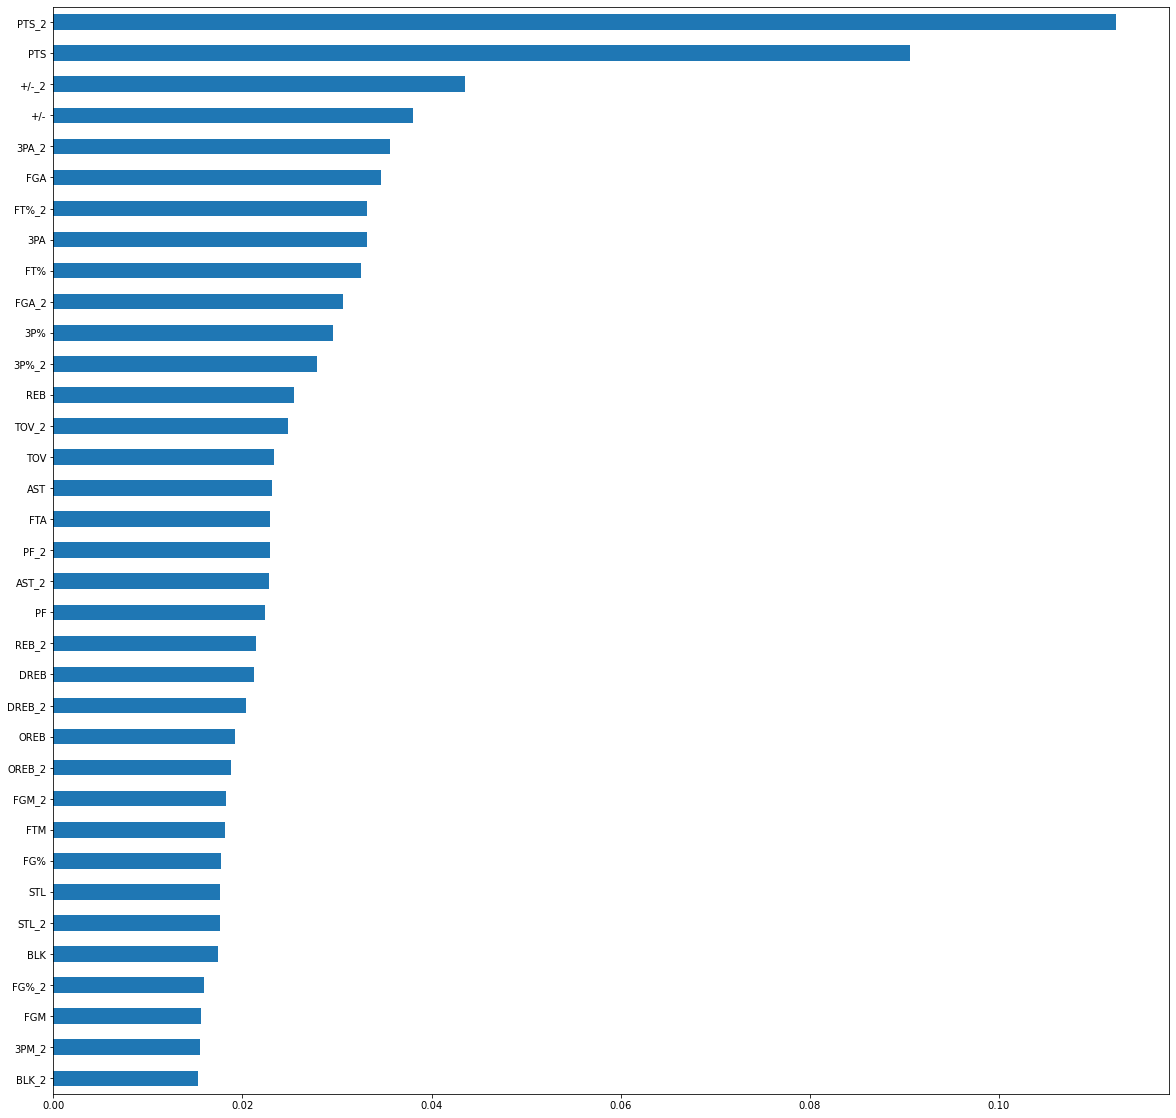

In [1022]:
#graphing to see some of the feature importance
rf_fit.feature_importances_

feature_importance = pd.Series(rf_fit.feature_importances_, index= X_feature_red.columns)
feature_importance.sort_values(inplace = True)
feature_importance.plot(kind = 'barh', figsize=(20,20))

# Prints out our winnig percentage for our prediction

In [1163]:
acc_list = []
zipped = zip(y_test, y_pred, rolling_data['over_under'])
for x in zipped:
    if x[0] > x[2] and x[1] > x[2]:
        acc_list.append('over')
    if x[0] < x[2] and x[1] < x[2]:
        acc_list.append('under')
    else:
        acc_list.append('lost')
        
lost = []
for item in acc_list:
    if item == 'lost':
        lost.append(item)
    
print ((len(acc_list) - len(lost)) / len(acc_list))

0.5139146567717996


In [1164]:
#10 day went back down to 51% 
#7 day average = %52   -7130

#5 day average = %50

#3 day average $49


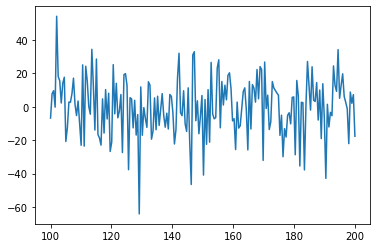

In [1030]:
space = np.linspace(100,200, 200)
plt.plot(space, y_pred[:200]-y_test[:200])

# initial testing of gradient boost 

In [961]:
gb = GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features='auto',
                          min_samples_leaf=2, n_estimators=50)
gb_fit = gb.fit(X_train, y_train)
y_pred = gb_fit.predict(X_test)

In [1167]:
rmse = rmse_error(y_test, y_pred)
rmse


113     194.5
122     196.0
123     212.0
125      10.5
127     202.0
        ...  
7276    231.0
7277    221.5
7278    223.5
7279    232.0
7280    226.0
Name: totals, Length: 7153, dtype: float64

In [1166]:
#calculate winning percentage based on both the target and predicted score are on the same side of the spread Over/Under
acc_list = []
zipped = zip(y_test, y_pred, ml_df['totals'])
for x in zipped:
    print(x)
    if x[0] > x[2] and x[1] > x[2]:
        acc_list.append('over')
    if x[0] < x[2] and x[1] < x[2]:
        acc_list.append('under')
    else:
        acc_list.append('lost')
    
lost = []
for item in acc_list:
    if item == 'lost':
        lost.append(item)

print ((len(acc_list) - len(lost)) / len(acc_list))

(203, 202.07279841269838, 194.5)
(212, 219.5904333333334, 196.0)
(223, 228.49210952380943, 212.0)
(209, 207.41476984126987, 10.5)
(165, 218.2168904761904, 202.0)
(204, 223.91673333333335, 203.5)
(215, 228.11237619047614, 200.5)
(201, 204.35186666666672, 213.5)
(209, 224.55378730158742, 212.0)
(192, 211.49005468975466, 204.5)
(230, 212.79658412698404, 201.5)
(212, 200.95845873015878, 197.0)
(205, 208.45942380952377, 200.5)
(207, 213.44345396825392, 210.0)
(191, 196.92371746031745, 181.0)
(197, 211.29170634920624, 210.0)
(215, 217.81086666666673, 199.0)
(212, 211.1061220779221, 202.0)
(201, 203.21804126984122, 204.5)
(240, 229.54470317460306, 187.5)
(239, 217.69652698412702, 196.0)
(173, 197.35849841269845, 210.0)
(231, 207.8120238095238, 204.5)
(197, 222.1724571428571, 208.5)
(203, 214.79386190476188, 208.0)
(214, 217.07236825396816, 207.0)
(216, 210.08588095238093, 199.0)
(189, 219.01083189033199, 209.0)
(184, 204.72166666666658, 198.0)
(240, 225.66540793650796, 205.0)
(186, 212.719787

(241, 217.8655206349206, 215.0)
(199, 210.87874920634926, 214.0)
(220, 222.06449437229426, 201.0)
(227, 227.49999999999994, 200.0)
(196, 209.34386031746024, 220.0)
(199, 205.48319047619046, 196.0)
(233, 222.8667548340548, 202.0)
(191, 207.89406190476188, 196.5)
(226, 220.31459047619043, 218.0)
(206, 222.50631904761906, 211.5)
(244, 205.3662380952381, 202.0)
(212, 216.6242542568542, 215.0)
(234, 221.41925079365086, 209.5)
(218, 227.176738095238, 220.0)
(230, 229.4698777777777, 195.5)
(220, 205.96075555555555, 205.0)
(211, 202.57303520923512, 204.5)
(219, 207.95341904761887, 205.0)
(238, 222.68107619047632, 15.5)
(168, 199.81473650793643, 204.0)
(217, 220.38352222222224, 199.0)
(226, 218.74916190476196, 211.0)
(225, 209.11531428571425, 206.0)
(214, 214.26922698412702, 196.5)
(220, 221.75184603174597, 203.5)
(203, 199.34791904761892, 213.0)
(220, 214.5966698412698, 203.0)
(211, 210.68860634920634, 202.0)
(251, 217.91323650793666, 215.0)
(222, 219.2881523809523, 200.5)
(220, 223.6882507936

(207, 204.04735238095242, 193.5)
(237, 204.87722857142867, 202.5)
(208, 209.66840317460318, 214.0)
(218, 210.8091476190476, 210.5)
(187, 195.352285137085, 207.0)
(227, 215.2716000000001, 228.0)
(224, 218.839438095238, 202.5)
(177, 206.21449206349206, 204.0)
(181, 197.94279206349202, 199.0)
(271, 221.16480793650788, 189.0)
(211, 223.07247301587293, 218.0)
(227, 206.38627619047617, 201.0)
(196, 200.41869307359312, 198.0)
(231, 222.78892380952377, 225.0)
(193, 204.15455238095237, 216.0)
(191, 197.43205873015862, 199.0)
(209, 207.16139841269842, 211.0)
(224, 214.58035367965374, 206.0)
(236, 221.92686666666677, 213.5)
(194, 212.07844126984125, 215.5)
(229, 212.7733523809524, 204.5)
(254, 231.06067936507935, 209.5)
(245, 215.5581682539683, 205.0)
(236, 216.23188095238092, 188.0)
(226, 226.78222222222215, 208.0)
(223, 224.4404968253968, 195.0)
(189, 217.44726031746032, 203.0)
(222, 217.31651111111103, 206.0)
(183, 200.15537142857144, 226.5)
(219, 221.07330793650792, 222.5)
(168, 214.427204761

In [1165]:
ml_df['totals'].value_counts()

220.0     151
208.0     149
218.0     140
221.0     139
214.0     138
         ... 
246.0       1
1955.5      1
246.5       1
17.5        1
247.5       1
Name: totals, Length: 138, dtype: int64

# Implementing a grid search to include cross val

In [566]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


#maybe use this for cross val later
#from sklearn.model_selection import cross_val_score
#all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [655]:
param_grid={'n_estimators':[50,75, 100, 150, 200, 250], 
            'learning_rate': [.2, 0.1,0.05,0.02],
            'max_depth':[4 ], 
            'min_samples_leaf': [2,4,6], 
            'max_features':['auto', 1, 3, 5, 10] }

gradient = GradientBoostingRegressor() 
pipe = GridSearchCV(estimator=gradient, cv=10, param_grid=param_grid, 
    n_jobs=-1)

In [709]:
# pipe.fit(X_train, y_train)

## Below are the results for best estimators in gradient boost

### results 
- RMSE = 255.7571029854123
- Betting winning percentage over/under = 0.5744016649323621

In [605]:
pipe.best_estimator_  = GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features='auto',
                          min_samples_leaf=2, n_estimators=50)

In [710]:
# y_pred = pipe.predict(X_test)

In [711]:
# y_pred = pipe.predict(X_test)

# Printing the RMSE, MAE, and winning percentage

In [1168]:

rmse = rmse_error(y_test, y_pred)
print ( rmse)

mae = mean_absolute_error(y_test, y_pred)

print (mae)

acc_list = []
zipped = zip(y_test, y_pred, ml_df['over_under'])
for x in zipped:
    if x[0] > x[2] and x[1] > x[2]:
        acc_list.append('over')
    if x[0] < x[2] and x[1] < x[2]:
        acc_list.append('under')
    else:
        acc_list.append('lost')
    
lost = []
for item in acc_list:
    if item == 'lost':
        lost.append(item)

print ((len(acc_list) - len(lost)) / len(acc_list))

324.1223050384229
13.586543730335974
0.4785172704296546


# Creating a profit function the testing data

## Details 
- Every game won is +100
- Every game lossed is -110


# Profit results

## If we were to bet on everysingle game in the NBA from 2017 - 2020 risking 115 to win 100 our profits would be $8,165.00 with a 57% winning percentage

In [1090]:
def calculating_profit():
    
    results_list = []
    zipped = zip(y_test, y_pred, ml_df['totals'])
    for x in zipped:
        if x[0] > x[2] and x[1] > x[2]:
            results_list.append(100)
        if x[0] < x[2] and x[1] < x[2]:
            results_list.append(100)
        else:
            results_list.append(-115)

     
    profit = 0
    for num in results_list:
        profit += num
    return profit


print (calculating_profit())        


#Results for fine tuning XGBoost with 3 day average
# -6295 with fine tuning

# -7960 xgboost not fine tuning

#Result 5 day model

#XGBOOSt fine tuning with a 5 day average

#-13355

#Results for fine tuning XGBoost with 7 day average
# -16280 this is 7 day average with fine tuning xgboost model

-10840


# Initial testing of xgboost

### Moving forward we are going to stick with Gradient Boost because is out performed Random Forest and XGboost in initial testing.

#### results 

- RMSE = 258.13753242634635
- Betting winning percentage over/under = 0.5610010427528676

In [1005]:
# Instantiation

gradient = xg.XGBRegressor(max_depth =3, learning_rate = 0.20, min_child_weight= 5, colsample_bytree = 0.95, seed = 42) 
gradient_fit= gradient.fit(X_train, y_train)
y_pred = gradient_fit.predict(X_test)

In [1006]:
rmse = rmse_error(y_test, y_pred)
rmse

368.2427328652691

In [1007]:
#checking to see how accurate the predictions are in terms of over under. 
acc_list = []
zipped = zip(y_test, y_pred, rolling_data['totals'])
for x in zipped:
    if x[0] > x[2] and x[1] > x[2]:
        acc_list.append('over')
    if x[0] < x[2] and x[1] < x[2]:
        acc_list.append('under')
    else:
        acc_list.append('lost')
    
lost = []
for item in acc_list:
    if item == 'lost':
        lost.append(item)

print ((len(acc_list) - len(lost)) / len(acc_list))

0.48322483725588383


In [761]:
#for some reason I always need to run this import if I run any other cells in between running the xgboost model
import xgboost as xg

In [787]:
learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
max_depth = [2, 3, 4, 5, 6, 8, 10, 12, 15]
min_child_weight = [ 1, 3, 5, 7, 9 ]
gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]  #gamme does not improve or decrease the performance of the model
colsample_bytree = [.1,.2, 0.3, 0.4, 0.5 ,.6, 0.7, .8, .9, .95 ] 


#This is to loop through the params and find out the best because it takes too long to run with a search grid
# for col in colsample_bytree:
#     gradient = xg.XGBRegressor(max_depth =3, learning_rate = 0.20, min_child_weight= 5, colsample_bytree = 0.95, seed = 42) 

#     gradient_fit= gradient.fit(X_train, y_train)
    
#     y_pred = gradient_fit.predict(X_test)
    
#     print(col)
#     print (mean_absolute_error(y_test, y_pred))
#     print (rmse_error(y_test, y_pred))
    
    
gradient = xg.XGBRegressor(max_depth =3, learning_rate = 0.20, min_child_weight= 5, colsample_bytree = 0.95, seed = 42) 

gradient_fit= gradient.fit(X_train, y_train)

y_pred = gradient_fit.predict(X_test)
    


# Implementing the Kappas

In [1131]:
def kappa_1():
    
    '''
    Returns the winning percentage when implementing kappa 1 thresholds
    '''
    #zipping together the
    
    pred_kappa1_under = zip(predictions, ml_df['Total_pts'], ml_df['k_1_under'], ml_df['totals'])
    #print(pred_kappa1_under)
    pred_kappa1_over = zip(predictions, ml_df['Total_pts'], ml_df['k_1_over'], ml_df['totals'])
    lost_list = []
    
    win = []
    for x in pred_kappa1_under:
        #print (x)
        #x[0] = predicted score
        #x[1] = actual total for that game
        #x[2] = the under kappa
        if x[0]  < x[2] and x[1] < x[3]:
            
            win.append('under')
            
        if x[0]  < x[2] and  x[1] > x[3]:
            
            lost_list.append('lost') 
            
    for x in pred_kappa1_over:
        
        if x[0]  > x[2] and  x[1] > x[3]:
            
            win.append('over')
        
        if x[0]  > x[2] and  x[1] < x[3]:
            
            lost_list.append('lost')
    print(len(win) + len(lost_list))
    
    
    
    return len(win) / (len(lost_list) +len(win))
            

In [1132]:
print(kappa_1())

7057
0.5085730480374097


In [1135]:
def kappa_2():
    
    '''
    Returns the winning percentage when implementing kappa 2 thresholds
    '''
    #zipping together the
    
    pred_kappa2_under = zip(predictions, ml_df['Total_pts'], ml_df['k_2_under'], ml_df['totals'])
    #print(pred_kappa1_under)
    pred_kappa2_over = zip(predictions, ml_df['Total_pts'], ml_df['k_2_over'], ml_df['totals'])
    lost_list = []
    
    win = []
    for x in pred_kappa2_under:
        #print (x)
        #x[0] = predicted score
        #x[1] = actual total for that game
        #x[2] = the under kappa
        if x[0]  < x[2] and x[1] < x[3]:
            
            win.append('under')
            
        if x[0]  < x[2] and  x[1] > x[3]:
            
            lost_list.append('lost') 
            
    for x in pred_kappa2_over:
        
        if x[0]  > x[2] and  x[1] > x[3]:
            
            win.append('over')
        
        if x[0]  > x[2] and  x[1] < x[3]:
            
            lost_list.append('lost')
    print(len(win) + len(lost_list))
    
    
    
    return len(win) / (len(lost_list) +len(win))
            

In [1136]:
print(kappa_2())

7044
0.5086598523566156


In [1138]:
def kappa_3():
    
    '''
    Returns the winning percentage when implementing kappa 3 thresholds
    '''
    #zipping together the
    
    pred_kappa3_under = zip(predictions, ml_df['Total_pts'], ml_df['k_3_under'], ml_df['totals'])
    #print(pred_kappa1_under)
    pred_kappa3_over = zip(predictions, ml_df['Total_pts'], ml_df['k_3_over'], ml_df['totals'])
    lost_list = []
    
    win = []
    for x in pred_kappa3_under:
        #print (x)
        #x[0] = predicted score
        #x[1] = actual total for that game
        #x[2] = the under kappa
        if x[0]  < x[2] and x[1] < x[3]:
            
            win.append('under')
            
        if x[0]  < x[2] and  x[1] > x[3]:
            
            lost_list.append('lost') 
            
    for x in pred_kappa3_over:
        
        if x[0]  > x[2] and  x[1] > x[3]:
            
            win.append('over')
        
        if x[0]  > x[2] and  x[1] < x[3]:
            
            lost_list.append('lost')
    print(len(win) + len(lost_list))
    
    
    
    return len(win) / (len(lost_list) +len(win))

print (kappa_3())

7001
0.5090701328381659


In [1150]:
def kappa_7():
    
    '''
    Returns the winning percentage when implementing kappa 3 thresholds
    '''
    #zipping together the
    
    pred_kappa7_under = zip(predictions, ml_df['Total_pts'], ml_df['k_7_under'], ml_df['totals'])
    #print(pred_kappa1_under)
    pred_kappa7_over = zip(predictions, ml_df['Total_pts'], ml_df['k_7_over'], ml_df['totals'])
    lost_list = []
    
    win = []
    for x in pred_kappa7_under:
        #print (x)
        #x[0] = predicted score
        #x[1] = actual total for that game
        #x[2] = the under kappa
        if x[0]  < x[2] and x[1] < x[3]:
            
            win.append('under')
            
        if x[0]  < x[2] and  x[1] > x[3]:
            
            lost_list.append('lost') 
            
    for x in pred_kappa7_over:
        
        if x[0]  > x[2] and  x[1] > x[3]:
            
            win.append('over')
        
        if x[0]  > x[2] and  x[1] < x[3]:
            
            lost_list.append('lost')
    print(len(win) + len(lost_list))
    
    
    
    return len(win) / (len(lost_list) +len(win))

print (kappa_7())

6677
0.511906544855474


In [1151]:
#The amount of bets taken and the winning percentage  for kappa 4
# 6935
# 0.5098774333093007

#The amount of bets taken and the winning percentage  for kappa 7
# 6677
# 0.511906544855474


In [1160]:
#This function returns the winning percentage when multiplying the kappa by 1.5
def kappa():
    
    '''
    Returns the winning percentage when implementing kappa thresholds
    '''
    #zipping together the
    
    pred_kappa_under = zip(predictions, ml_df['Total_pts'], ml_df['k_under'], ml_df['totals'])
    #print(pred_kappa1_under)
    pred_kappa_over = zip(predictions, ml_df['Total_pts'], ml_df['k_over'], ml_df['totals'])
    lost_list = []
    
    win = []
    for x in pred_kappa_under:
        
        #x[0] = predicted score
        #x[1] = actual total for that game
        #x[2] = the under kappa
        #x[3] = the vegas total
        if x[0]  < x[2] and x[1] < x[3]:
            
            win.append('under')
            
        if x[0]  < x[2] and  x[1] > x[3]:
            
            lost_list.append('lost') 
            
    for x in pred_kappa_over:
        #x[0] = predicted score
        #x[1] = actual total for that game
        #x[2] = the over kappa
        #x[3] = the vegas total
        
        if x[0]  > x[2] and  x[1] > x[3]:
            
            win.append('over')
        
        if x[0]  > x[2] and  x[1] < x[3]:
            
            lost_list.append('lost')
    print(len(win) + len(lost_list))
    
    
    
    return len(win) / (len(lost_list) +len(win))

print (kappa())

3704
0.519438444924406


# Creating the visuals for the presentation 